In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import json
from shapely.geometry import Point, Polygon

/Users/vivianjin/anaconda3/lib/python3.7/site-packages/fiona/collection.py:208: FeatureWarning: Empty field name at index 0
  self._schema = self.session.get_schema()
/Users/vivianjin/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:577: UserWarning: Empty field name at index 0
  for feature in features_lst:


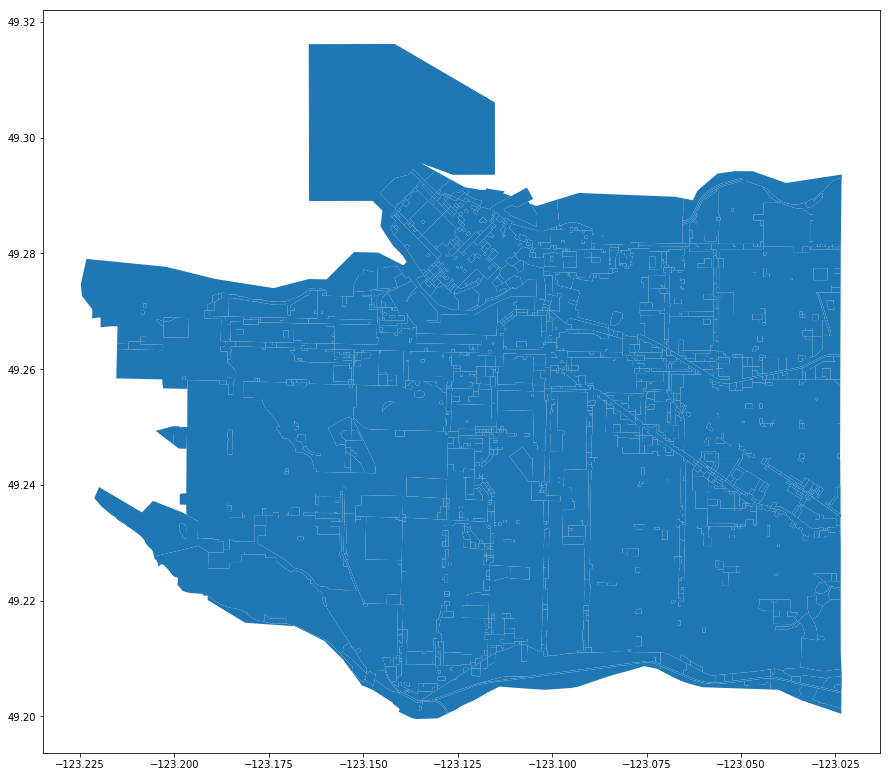

In [3]:
# load in .shp files 
street_map = gpd.read_file('zoning-districts-and-labels.shp')
parks_map = gpd.read_file('parks.shp')
shoreline_map = gpd.read_file('shoreline-2002.shp')

# test out a plot
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

In [5]:
# read json data into a pandas DataFrame
df = pd.read_json('stations.json', orient='stations')
df = pd.json_normalize(df['stations'])
df

station_id                                   name        lat         lon  \
0         0001                          10th & Cambie  49.262487 -123.114397   
1         0002  Burrard Station (Melville & Dunsmuir)  49.285871 -123.121050   
2         0004            Yaletown-Roundhouse Station  49.274566 -123.121817   
3         0005                      Dunsmuir & Beatty  49.279764 -123.110154   
4         0006                Olympic Village Station  49.266314 -123.116011   
..         ...                                    ...        ...         ...   
197       0285                   Commercial & Pandora  49.283236 -123.070443   
198       0287          Carolina & Great Northern Way  49.267266 -123.090786   
199       0297                    6th & Prince Edward  49.265242 -123.095577   
200       0298                         6th & Carolina  49.265213 -123.090785   
201       0300                         Bute & Barclay  49.284893 -123.128685   

     capacity  
0          35  
1          28  
2          16  
3          26  
4          26  
..        ...  
197        16  
198        16  
199        16  
200        16  
201        14  

[202 rows x 5 columns]

In [7]:
# all stations
pd.set_option('display.max_rows', None)
df['station_id']

0      0001
1      0002
2      0004
3      0005
4      0006
5      0007
6      0008
7      0009
8      0010
9      0011
10     0012
11     0014
12     0015
13     0016
14     0017
15     0019
16     0021
17     0024
18     0025
19     0026
20     0027
21     0028
22     0030
23     0031
24     0032
25     0033
26     0034
27     0035
28     0036
29     0037
30     0039
31     0040
32     0041
33     0044
34     0045
35     0047
36     0048
37     0050
38     0052
39     0053
40     0054
41     0055
42     0057
43     0058
44     0060
45     0063
46     0064
47     0065
48     0066
49     0068
50     0069
51     0070
52     0071
53     0072
54     0073
55     0074
56     0076
57     0077
58     0078
59     0079
60     0080
61     0081
62     0082
63     0083
64     0084
65     0087
66     0088
67     0089
68     0092
69     0093
70     0096
71     0098
72     0099
73     0101
74     0102
75     0103
76     0104
77     0105
78     0106
79     0107
80     0108
81     0109
82     0110
83  

In [11]:
# store total count in variable
total_num_stations = df.count()
total_num_stations

station_id    202
name          202
lat           202
lon           202
capacity      202
dtype: int64

In [12]:
# create coordinates from lat/lon
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs={'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

/Users/vivianjin/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


station_id                                   name        lat         lon  \
0       0001                          10th & Cambie  49.262487 -123.114397   
1       0002  Burrard Station (Melville & Dunsmuir)  49.285871 -123.121050   
2       0004            Yaletown-Roundhouse Station  49.274566 -123.121817   
3       0005                      Dunsmuir & Beatty  49.279764 -123.110154   
4       0006                Olympic Village Station  49.266314 -123.116011   

   capacity                     geometry  
0        35  POINT (-123.11440 49.26249)  
1        28  POINT (-123.12105 49.28587)  
2        16  POINT (-123.12182 49.27457)  
3        26  POINT (-123.11015 49.27976)  
4        26  POINT (-123.11601 49.26631)

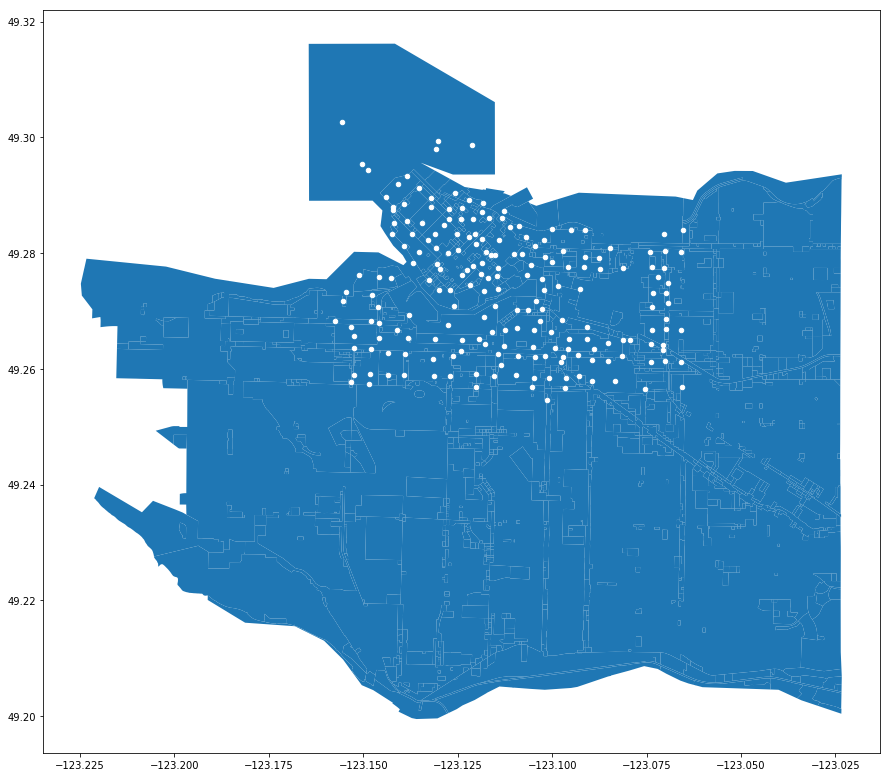

In [13]:
# plot all stations on map
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)
geo_df.plot(ax=ax, markersize=20, color='white', marker='o', label = 'Point')

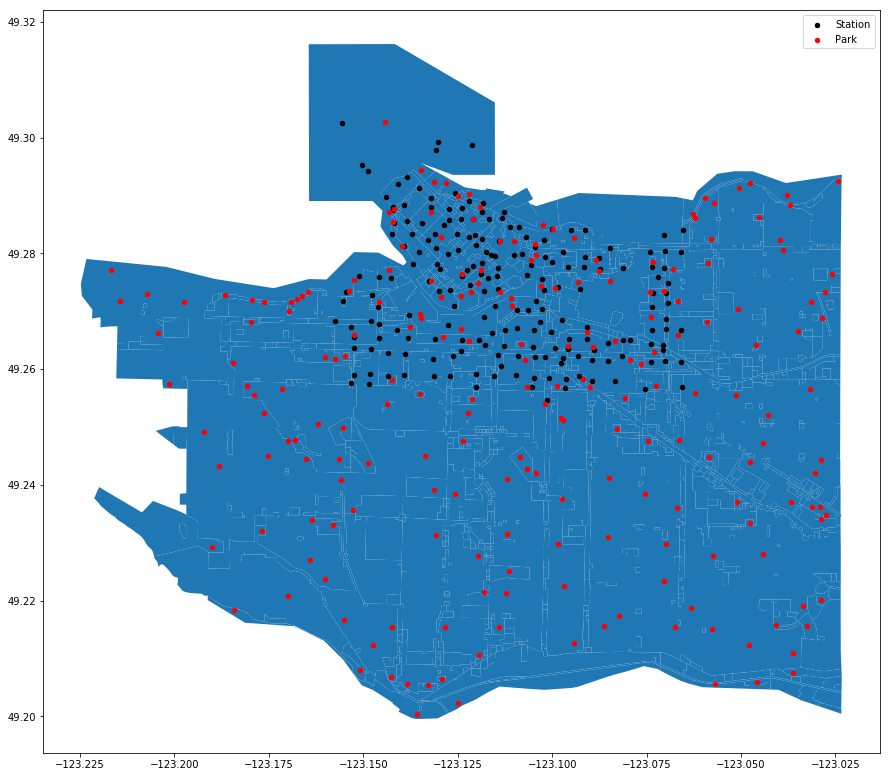

In [108]:
# plot stations and parks on map

fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)
geo_df.plot(ax=ax, markersize=20, color='black', marker='o', label = 'Station')
parks_map.plot(ax=ax, markersize=20, color='red', marker='o', label = 'Park')
ax.legend()

In [18]:
# thought I would need lat/lon for park locations to calculate distances
parks_df = pd.DataFrame(parks_map)
parks_df['lat'] = [point.y for point in parks_df['geometry']]
parks_df['lon'] = [point.x for point in parks_df['geometry']]

In [20]:
# stations that are within 200m of a park

count = 0
geo_df.to_crs(epsg=3310,inplace=True)
parks_map.to_crs(epsg=3310,inplace=True)
for index, row in geo_df.iterrows():
    for index2, row2 in parks_map.iterrows():
        dist = row2['geometry'].distance(row['geometry'])
        if dist < 200:
            count += 1
count

79

In [22]:
# % of stations that are within 200m of a park
count/total_num_stations * 100

station_id    39.108911
name          39.108911
lat           39.108911
lon           39.108911
capacity      39.108911
dtype: float64

/Users/vivianjin/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


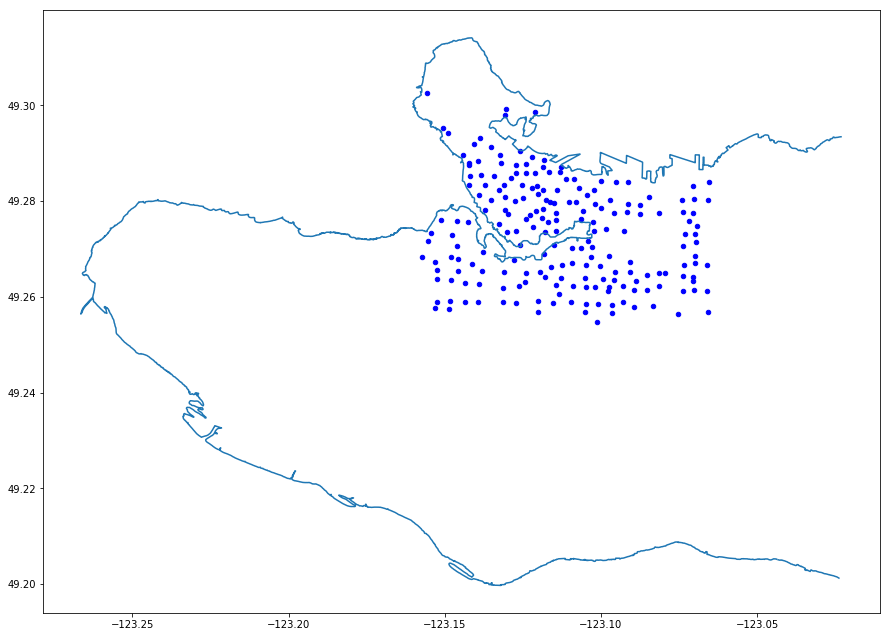

In [24]:
# plot stations on shoreline map
fig, ax = plt.subplots(figsize = (15,15))
crs={'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
shoreline_map.plot(ax=ax)
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Station')

In [25]:
# stations that are within 200m of the shoreline
count = 0
geo_df.to_crs(epsg=3310,inplace=True)
shoreline_map.to_crs(epsg=3310,inplace=True)
for index, row in geo_df.iterrows():
    for index2, row2 in shoreline_map.iterrows():
        dist = row2['geometry'].distance(row['geometry'])
        if dist < 200:
            count += 1
count

37

In [26]:
# % of stations that are within 200m of the shoreline
count/total_num_stations * 100

station_id    18.316832
name          18.316832
lat           18.316832
lon           18.316832
capacity      18.316832
dtype: float64

In [27]:
# manually filter for top 5 departure stations (found by SQL querying)
crs={'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
top_5_departure = geo_df[geo_df["station_id"].isin(['0209', '0105', '0102', '0066', '0036'])]
top_5_departure.head()

/Users/vivianjin/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


station_id                               name        lat         lon  \
28        0036                      Bute & Robson  49.285836 -123.127265   
48        0066                     Anderson & 2nd  49.269361 -123.137820   
74        0102  Stanley Park - Second Beach North  49.295340 -123.150433   
77        0105         Stanley Park - Totem Poles  49.298657 -123.121176   
143       0209   Stanley Park - Information Booth  49.297933 -123.130758   

     capacity                     geometry  
28         26  POINT (-123.12726 49.28584)  
48         28  POINT (-123.13782 49.26936)  
74         16  POINT (-123.15043 49.29534)  
77         20  POINT (-123.12118 49.29866)  
143        20  POINT (-123.13076 49.29793)

In [28]:
# manually filter for top 5 return stations (found by SQL querying)
top_5_return = geo_df[geo_df["station_id"].isin(['0209', '0028', '0102', '0066', '0083'])]
top_5_return.head()

station_id                               name        lat         lon  \
21        0028                      Davie & Beach  49.287528 -123.142139   
48        0066                     Anderson & 2nd  49.269361 -123.137820   
63        0083                     Aquatic Centre  49.278210 -123.136972   
74        0102  Stanley Park - Second Beach North  49.295340 -123.150433   
143       0209   Stanley Park - Information Booth  49.297933 -123.130758   

     capacity                     geometry  
21         30  POINT (-123.14214 49.28753)  
48         28  POINT (-123.13782 49.26936)  
63         39  POINT (-123.13697 49.27821)  
74         16  POINT (-123.15043 49.29534)  
143        20  POINT (-123.13076 49.29793)

In [29]:
# manually filter for bottom 5 return and departure stations (found by SQL querying)
bottom_5_return = geo_df[geo_df["station_id"].isin(['0129', '0221', '0165', '0227', '0066'])]
bottom_5_return.head()

bottom_5_departure = geo_df[geo_df["station_id"].isin(['0221', '0066', '0129', '0165', '0052'])]
bottom_5_departure.head()

station_id                           name        lat         lon  \
38        0052                 Cambie & Water  49.284605 -123.108662   
48        0066                 Anderson & 2nd  49.269361 -123.137820   
92        0129              Richards & Robson  49.280216 -123.117639   
113       0165  Columbia & 4th - TEMP REMOVED  49.267120 -123.109370   
151       0221                   Glen & Union  49.277469 -123.081315   

     capacity                     geometry  
38         32  POINT (-123.10866 49.28460)  
48         28  POINT (-123.13782 49.26936)  
92         22  POINT (-123.11764 49.28022)  
113         0  POINT (-123.10937 49.26712)  
151        14  POINT (-123.08132 49.27747)

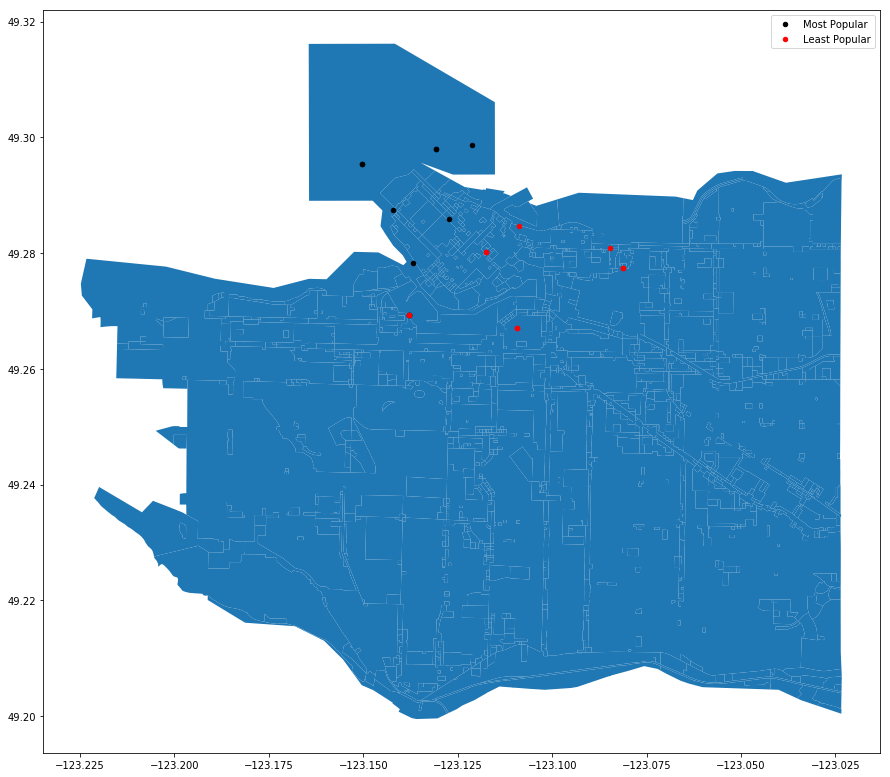

In [30]:
# plot all points (ended up with 6 for each category due to overlap between return and departure stations)
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)
top_5_return.plot(ax=ax, markersize=20, color='black', marker='o', label = 'Most Popular')
top_5_departure.plot(ax=ax, markersize=20, color='black', marker='o')
bottom_5_return.plot(ax=ax, markersize=20, color='red', marker='o', label = 'Least Popular')
bottom_5_departure.plot(ax=ax, markersize=20, color='red', marker='o')
ax.legend()